In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

In [3]:
df = pd.read_csv('tested.csv')

print("--- Initial Data Exploration ---")
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\n----------------------------------")
print("Dataset Information:")
df.info()

print("\n----------------------------------")
print("Missing Values per Column:")
print(df.isnull().sum())

print("\n----------------------------------")
print("Summary Statistics for Numerical Columns:")
print(df.describe())

--- Initial Data Exploration ---

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

----------------------

C:\Users\kkjeg\AppData\Local\Temp\ipykernel_27196\980813540.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\kkjeg\AppData\Local\Temp\ipykernel_27196\980813540.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp


--- Univariate Analysis ---

Value counts for key categorical columns:

--- Survived ---
Survived
0    266
1    152
Name: count, dtype: int64

--- Pclass ---
Pclass
3    218
1    107
2     93
Name: count, dtype: int64

--- Sex ---
Sex
male      266
female    152
Name: count, dtype: int64

--- SibSp ---
SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

--- Parch ---
Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

--- Embarked ---
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


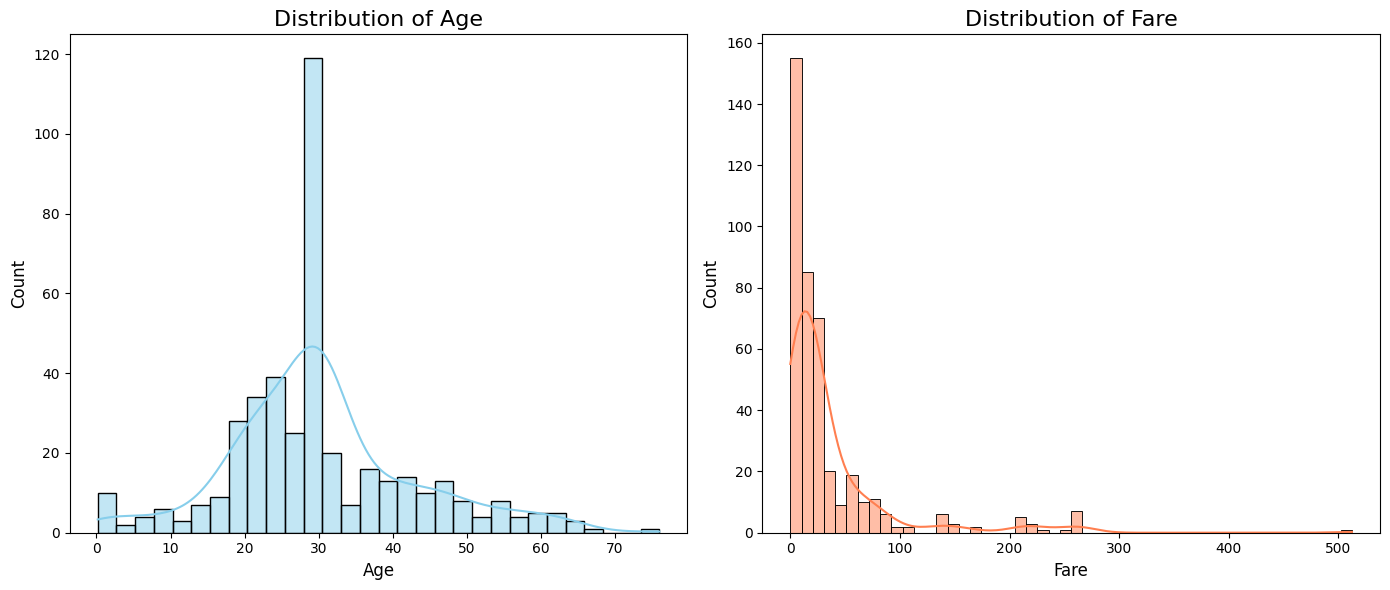

In [4]:
# Fill missing 'Age' values with the mean of the column
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill the single missing 'Fare' value with the median of the column
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# For correlation analysis, we need to convert the 'Sex' column into a numerical format.
# 'male' will be 0 and 'female' will be 1.
df['Sex_numeric'] = df['Sex'].map({'male': 0, 'female': 1})
print("\n--- Univariate Analysis ---")
print("\nValue counts for key categorical columns:")
for column in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    print(f"\n--- {column} ---")
    print(df[column].value_counts())

# Plot histograms for 'Age' and 'Fare' to visualize their distributions.
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], kde=True, bins=50, color='coral')
plt.title('Distribution of Fare', fontsize=16)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


--- Univariate Analysis ---

Value counts for key categorical columns:

--- Survived ---
Survived
0    266
1    152
Name: count, dtype: int64

--- Pclass ---
Pclass
3    218
1    107
2     93
Name: count, dtype: int64

--- Sex ---
Sex
male      266
female    152
Name: count, dtype: int64

--- SibSp ---
SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

--- Parch ---
Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

--- Embarked ---
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


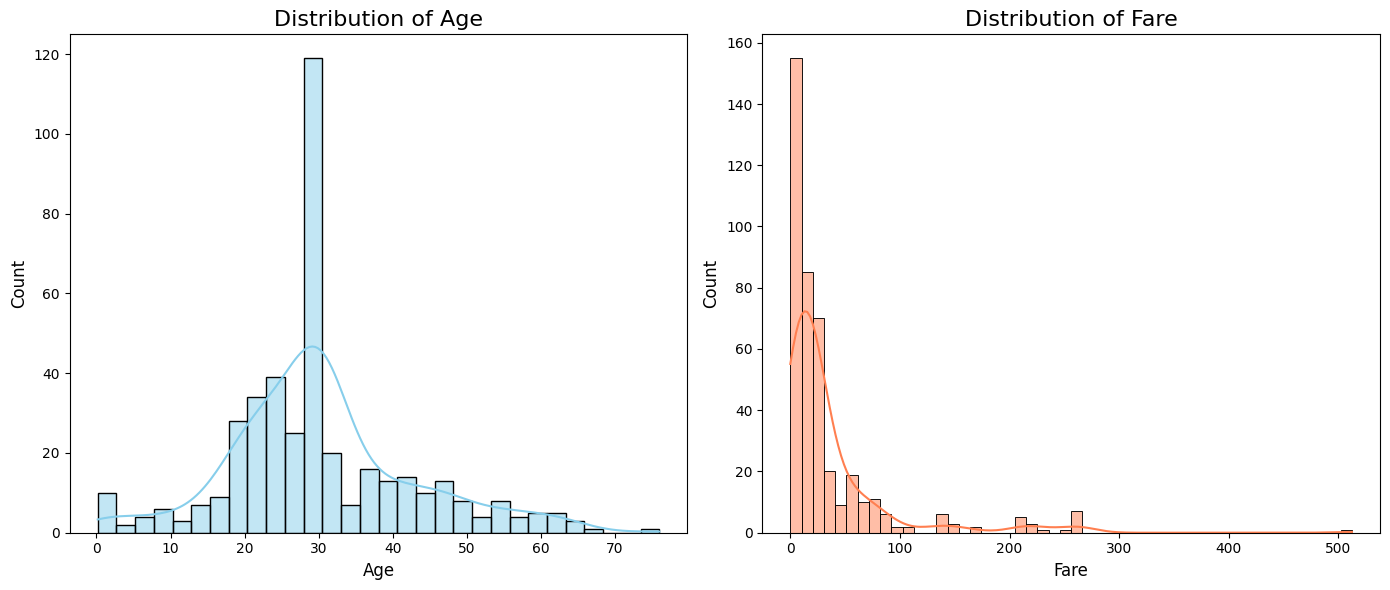

In [5]:
print("\n--- Univariate Analysis ---")
print("\nValue counts for key categorical columns:")
for column in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    print(f"\n--- {column} ---")
    print(df[column].value_counts())

# Plot histograms for 'Age' and 'Fare' to visualize their distributions.
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], kde=True, bins=50, color='coral')
plt.title('Distribution of Fare', fontsize=16)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


--- Bivariate Analysis: Correlation Heatmap ---


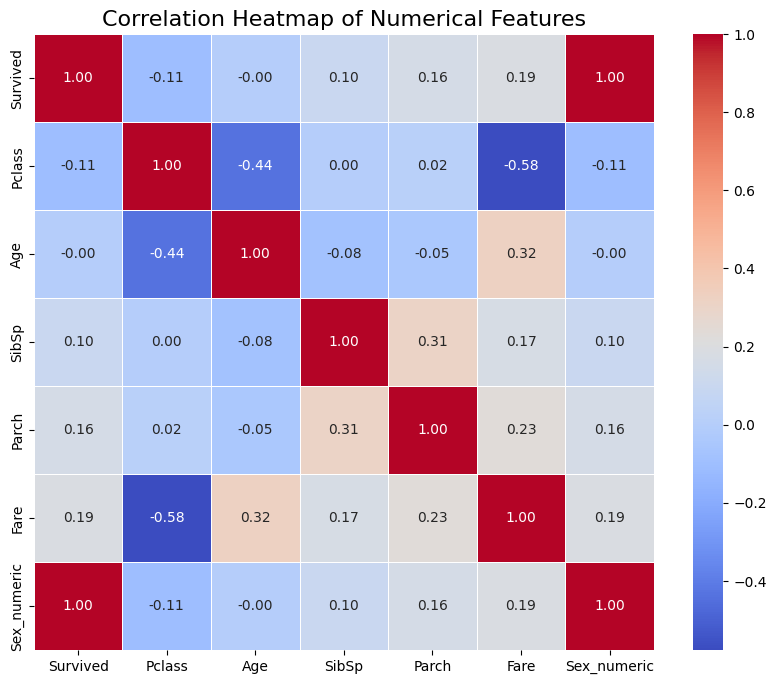

In [8]:
# Cell 5: Correlation Heatmap
# ------------------------------------------------------------------------------
print("\n--- Bivariate Analysis: Correlation Heatmap ---")
plt.figure(figsize=(10, 8))
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_numeric']
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()


--- Bivariate Analysis: Survival by Passenger Class ---


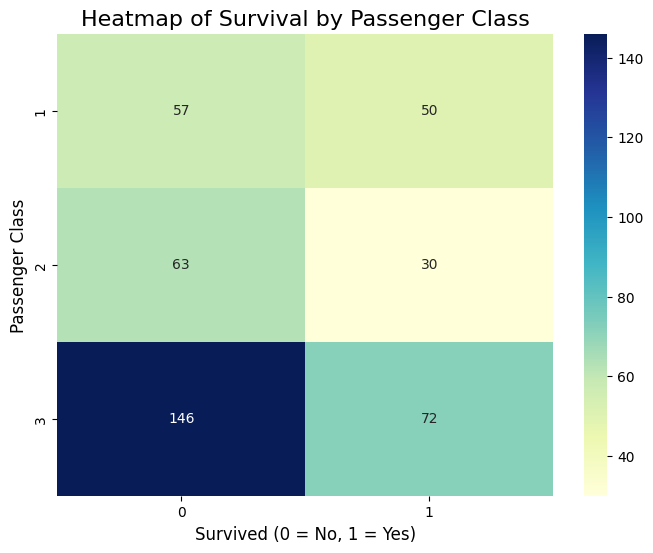

In [9]:
# Cell 6: Survival by Passenger Class Heatmap
# ------------------------------------------------------------------------------
print("\n--- Bivariate Analysis: Survival by Passenger Class ---")
crosstab_pclass_survived = pd.crosstab(df['Pclass'], df['Survived'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_pclass_survived, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Survival by Passenger Class', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Passenger Class', fontsize=12)
plt.show()


--- Bivariate Analysis: Survival by Gender ---


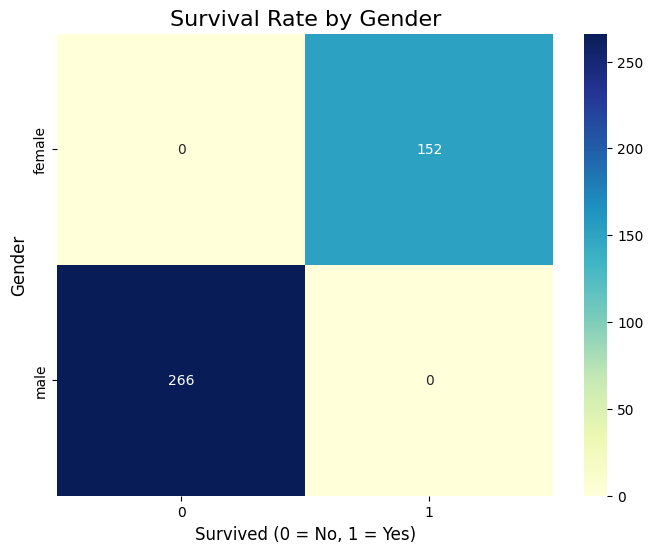

In [10]:
# Cell 7: Survival by Gender Heatmap
# ------------------------------------------------------------------------------
print("\n--- Bivariate Analysis: Survival by Gender ---")
crosstab_sex_survived = pd.crosstab(df['Sex'], df['Survived'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_sex_survived, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Survival Rate by Gender', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.show()

In [11]:
# Cell 8: Final Summary
# ------------------------------------------------------------------------------
# The final summary of the EDA, presented as a concluding text cell.
print("\n--- End of Notebook ---")
print("\nFinal Summary of Key Findings:")
print("1. Correlation Heatmap: The strongest positive correlation with survival is with gender ('Sex_numeric'), indicating females had a much higher survival rate. Pclass has a strong negative correlation, meaning passengers in higher classes had a better chance of survival.")
print("2. Pclass vs. Survival Heatmap: This visualization clearly shows that a significantly larger number of passengers from the lower class (Pclass 3) did not survive, compared to the higher classes.")
print("3. Gender vs. Survival Heatmap: This final heatmap visually confirms the most significant finding from the correlation analysis: female passengers had a dramatically higher survival count than male passengers.")
print("\nThis EDA provides a solid foundation for building a predictive model for Titanic survival.")



--- End of Notebook ---

Final Summary of Key Findings:
1. Correlation Heatmap: The strongest positive correlation with survival is with gender ('Sex_numeric'), indicating females had a much higher survival rate. Pclass has a strong negative correlation, meaning passengers in higher classes had a better chance of survival.
2. Pclass vs. Survival Heatmap: This visualization clearly shows that a significantly larger number of passengers from the lower class (Pclass 3) did not survive, compared to the higher classes.
3. Gender vs. Survival Heatmap: This final heatmap visually confirms the most significant finding from the correlation analysis: female passengers had a dramatically higher survival count than male passengers.

This EDA provides a solid foundation for building a predictive model for Titanic survival.
